In [21]:
#coding:utf-8
import wave
import numpy as np
from pylab import *

In [22]:
# 離散フーリエ変換
def dft (start, x, N):
    """xのstartサンプル目からのNサンプルを周期波形とみなしたDFT値を返す"""
    X = [0.0] * N
    for k in range(N):
        for n in range(N):
            real = np.cos(2 * np.pi * k * n / N)
            imag = - np.sin(2 * np.pi * k * n / N)
            X[k] += x[start + n] * complex(real, imag)
    return X

In [23]:
# 読み込み
wf = wave.open("/Users/jin237/Documents/juxta_data/juxtaphony_project/prelminary_experiment/sound_data/whispervoice/sasayaki_throat.wav" , "r" )
# サンプリング周波数
fs = wf.getframerate()  
print(fs)

44100


In [24]:
# フレーム数を取得
x = wf.readframes(wf.getnframes())
# -1 - +1に正規化した波形
# bytes から ndarray 1次元配列へ変換
# 16ビットのファイルなら32768〜32767の範囲で読み込まれる。
x = frombuffer(x, dtype= "int16") / 32768.0  
print(len(x))
wf.close()

1149322


In [ ]:
# サンプリングする開始位置
start = 0    
# サンプル数
N = 1149322
# 離散フーリエ変換
X = dft(start, x, N)
# 周波数のリスト
freqList = [k * fs / N for k in range(N)] 
print(max(freqList))
# 振幅スペクトル np.abs()
amplitudeSpectrum = [np.sqrt(c.real ** 2 + c.imag ** 2) for c in X] 
print(max(amplitudeSpectrum))
# 位相スペクトル np.angle()
phaseSpectrum = [np.arctan2(int(c.imag), int(c.real)) for c in X]      
print(max(phaseSpectrum))

In [ ]:
# 波形サンプルを描画
plot(range(start, start+N), x[start:start+N])
axis([start, start+N, -0.35/100, 0.35/100])
plt.grid()
xlabel("time [sec]")
ylabel("amplitude")
show()

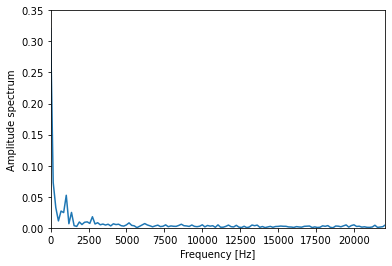

In [46]:
# 振幅スペクトルを描画
plot(freqList, amplitudeSpectrum, linestyle='-')
# ナイキスト周波数まで表示すれば十分
axis([0, fs/2, 0, 0.35])    
xlabel("Frequency [Hz]")
ylabel("Amplitude spectrum")
show()

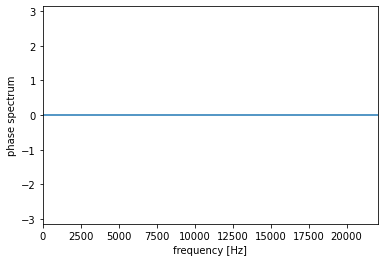

In [49]:
# 位相スペクトルを描画
plot(freqList, phaseSpectrum,  linestyle='-')
axis([0, fs/2, -np.pi, np.pi])
xlabel("frequency [Hz]")
ylabel("phase spectrum")

show()